In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import warnings
warnings.filterwarnings("ignore")


In [4]:
import numpy as np
import pandas as pd 

In [5]:
import sys
sys.path.append('../../../')

In [6]:
import matplotlib.pyplot as plt 

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [8]:
from src.utils.dates import get_nyse_business_dates

In [9]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [10]:
from src.settings import Settings

In [11]:
from src.utils.io.read import PreprocessedDataReader

In [12]:
from src.preprocessing.base import FutureTicker

In [13]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [14]:
dataset = pdr.read_dataset(ticker=FutureTicker.WTI)

In [15]:
dataset.shape

(813, 63)

In [16]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,forward_CommercialShortPosition_to_openinterest_change,ManagedMoney_NetPosition_to_openinterest_change,prior_report_ManagedMoney_NetPosition_to_openinterest_change,forward_ManagedMoney_NetPosition_to_openinterest_change,ManagedMoney_LongPosition_to_openinterest_change,prior_report_ManagedMoney_LongPosition_to_openinterest_change,forward_ManagedMoney_LongPosition_to_openinterest_change,ManagedMoney_ShortPosition_to_openinterest_change,prior_report_ManagedMoney_ShortPosition_to_openinterest_change,forward_ManagedMoney_ShortPosition_to_openinterest_change
811,2025-07-22,CL,355309.0,1179861.0,824552.0,208836.0,406472.0,197636.0,-13379.0,31871.0,...,-0.010335,-0.001610,-0.027664,-0.001536,0.006267,-0.021889,0.00081,0.007877,0.005775,0.002346
812,2025-07-29,CL,362436.0,1172427.0,809991.0,207342.0,411275.0,203933.0,7127.0,-13379.0,...,NaN,-0.001536,-0.001610,NaN,0.000810,0.006267,NaN,0.002346,0.007877,NaN


In [17]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'F1_RolledPrice',
 'F2_RolledPrice',
 'F3_RolledPrice',
 'F1_RolledPrice_rolling_20D_volatility',
 'F2_RolledPrice_rolling_20D_volatility',
 'F3_RolledPrice_rolling_20D_volatility',
 'SyntheticF1MinusF2_RolledPrice',
 'prior_report_SyntheticF1MinusF2_RolledPrice_change',
 'prior_cumulative_5D_F1_V

In [18]:
dataset['Commercial_NetPosition'].describe()

count       813.000000
mean     -11247.533825
std      156021.927084
min     -315658.000000
25%     -146916.000000
50%       13553.000000
75%       95631.000000
max      368688.000000
Name: Commercial_NetPosition, dtype: float64

In [19]:
dataset['ManagedMoney_NetPosition'].describe()

count       813.000000
mean     405093.035670
std      162420.952528
min      100633.000000
25%      273760.000000
50%      366026.000000
75%      518079.000000
max      848584.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [20]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

0

In [21]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [22]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [23]:
for name in [ 'prior_cumulative_5D_F1_Volume',
                 'prior_cumulative_5D_F2_Volume',
                 'prior_cumulative_5D_F1MinusF2_Volume' ,
            'F1_RolledPrice',
 'F2_RolledPrice',
 'F3_RolledPrice']:
    dataset[f'{name}_change'] = dataset[name] - dataset[name].shift(1)
    dataset[f'next_{name}_change'] =  dataset[name].shift(-1) - dataset[name] 
    
    

In [24]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'F1_RolledPrice',
 'F2_RolledPrice',
 'F3_RolledPrice',
 'F1_RolledPrice_rolling_20D_volatility',
 'F2_RolledPrice_rolling_20D_volatility',
 'F3_RolledPrice_rolling_20D_volatility',
 'SyntheticF1MinusF2_RolledPrice',
 'prior_report_SyntheticF1MinusF2_RolledPrice_change',
 'prior_cumulative_5D_F1_V

In [25]:
unscaled_response_names= ['ManagedMoney_NetPosition_change',
                          'ManagedMoney_LongPosition_change',
                          'ManagedMoney_ShortPosition_change']
scaled_response_names = ['ManagedMoney_NetPosition_to_openinterest_change',
                         'ManagedMoney_LongPosition_to_openinterest_change',
                         'ManagedMoney_ShortPosition_to_openinterest_change']
feature_names =  ['prior_report_ManagedMoney_NetPosition_change',
                  'prior_report_ManagedMoney_LongPosition_change',
                  'prior_report_ManagedMoney_ShortPosition_change',
                  'prior_report_ManagedMoney_NetPosition_to_openinterest_change',
                  'prior_report_ManagedMoney_LongPosition_to_openinterest_change',
                  'prior_report_ManagedMoney_ShortPosition_to_openinterest_change',
                  'prior_report_SyntheticF1MinusF2_RolledPrice_change',
                  'prior_cumulative_5D_F1_Volume_change',
                  'prior_cumulative_5D_F2_Volume_change',
                  'prior_cumulative_5D_F1MinusF2_Volume_change',
                  'prior_5D_F1_OI_change',
                  'prior_5D_F2_OI_change',
                  'prior_5D_AGG_OI_change',
                  'prior_5D_F1MinusF2_openinterest_change',
                  'F1_RolledPrice_rolling_20D_volatility',
                  'F2_RolledPrice_rolling_20D_volatility',
                  'F3_RolledPrice_rolling_20D_volatility',
                  'F1_RolledPrice_change',
                  'F2_RolledPrice_change',
                  'F3_RolledPrice_change'
                 
                 ]

In [26]:
?get_features_responses_correlation

Signature:
get_features_responses_correlation(
    dataset: pandas.core.frame.DataFrame,
    features: list[str],
    responses: list[str],
    method: str = 'spearman',
) -> pandas.core.frame.DataFrame
Docstring: " Computes the correlation between a list of features and a list of responses 
File:      ~/Documents/Projects/omroot_repos/COTAME/research/metrics.py
Type:      function

In [27]:
get_features_responses_correlation(dataset = dataset,
                                   features = feature_names,
                                   responses=unscaled_response_names).sort_values(by = unscaled_response_names[0])

,Feature,ManagedMoney_NetPosition_change,ManagedMoney_LongPosition_change,ManagedMoney_ShortPosition_change
2,prior_report_ManagedMoney_ShortPosition_change,-0.106091,-0.070016,0.052160
5,prior_report_ManagedMoney_ShortPosition_to_ope...,-0.101940,-0.066454,0.051725
7,prior_cumulative_5D_F1_Volume_change,-0.082255,0.051661,0.169758
9,prior_cumulative_5D_F1MinusF2_Volume_change,-0.070258,0.059023,0.157437
14,F1_RolledPrice_rolling_20D_volatility,-0.056452,-0.087253,0.000475
15,F2_RolledPrice_rolling_20D_volatility,-0.054038,-0.082386,0.002839
16,F3_RolledPrice_rolling_20D_volatility,-0.053886,-0.080187,0.004442
13,prior_5D_F1MinusF2_openinterest_change,-0.050116,-0.009254,0.068659
10,prior_5D_F1_OI_change,-0.047568,0.020953,0.095505
6,prior_report_SyntheticF1MinusF2_RolledPrice_ch...,-0.037126,-0.015644,0.030848


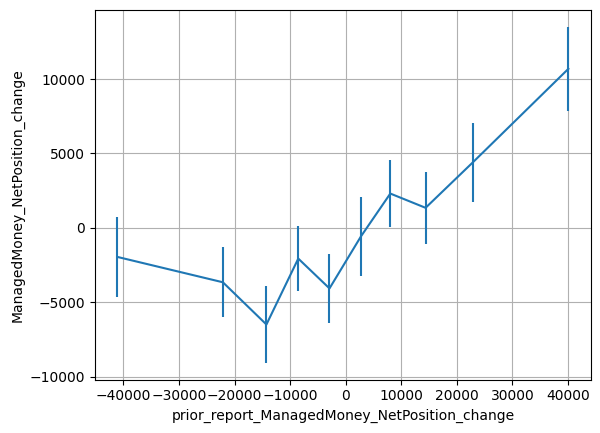

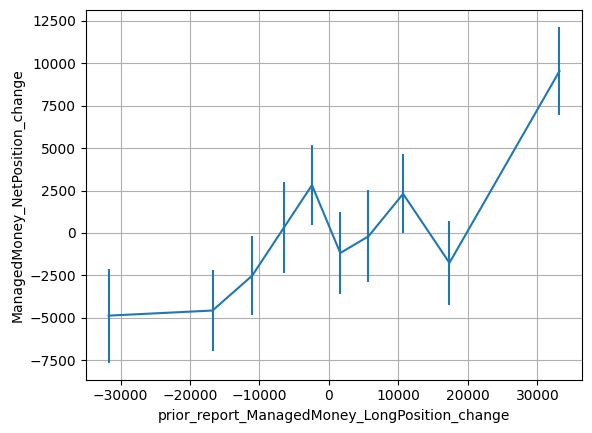

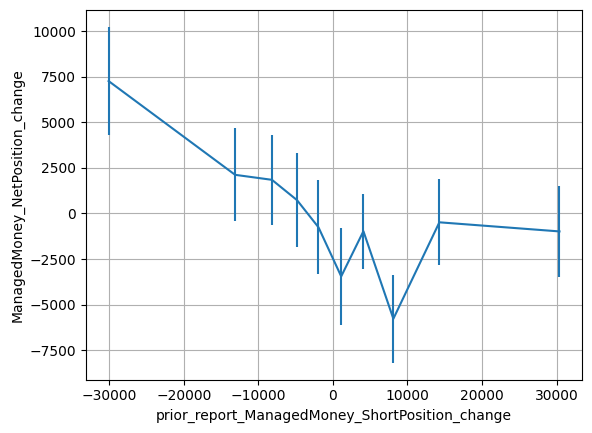

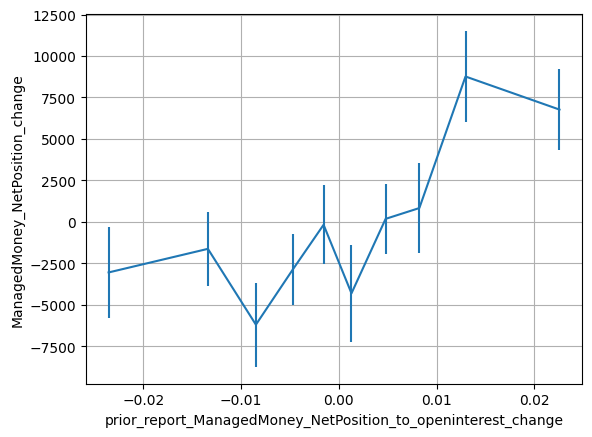

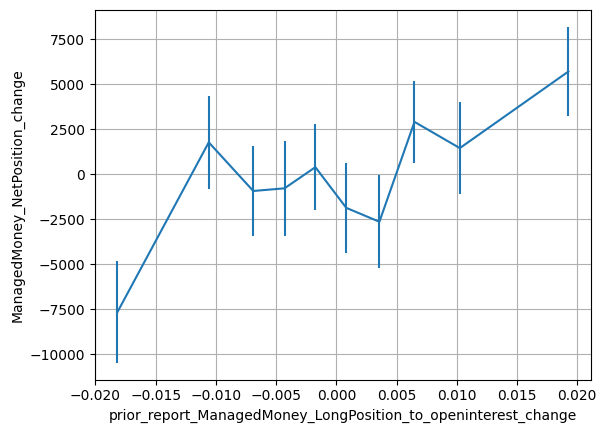

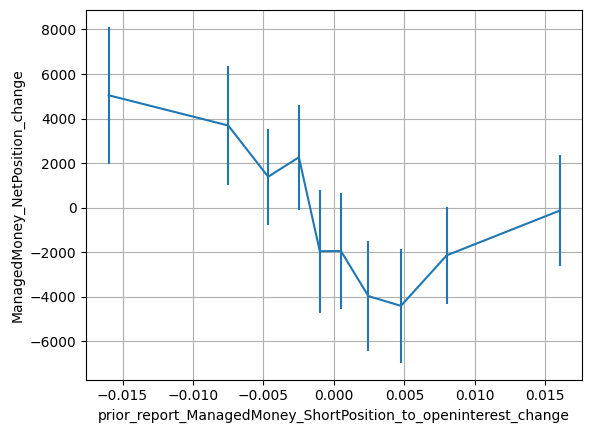

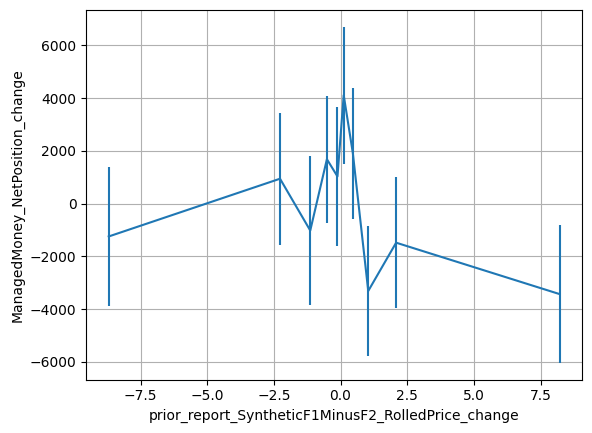

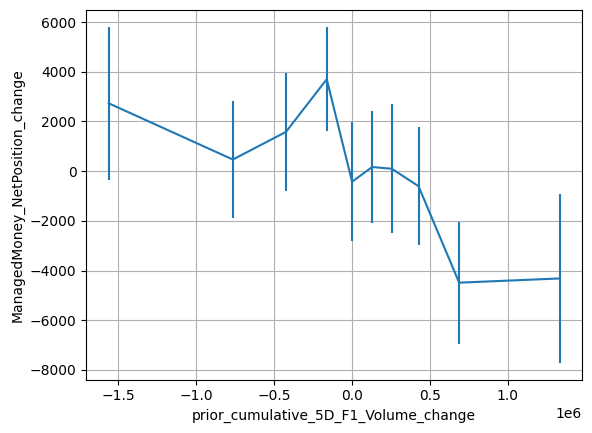

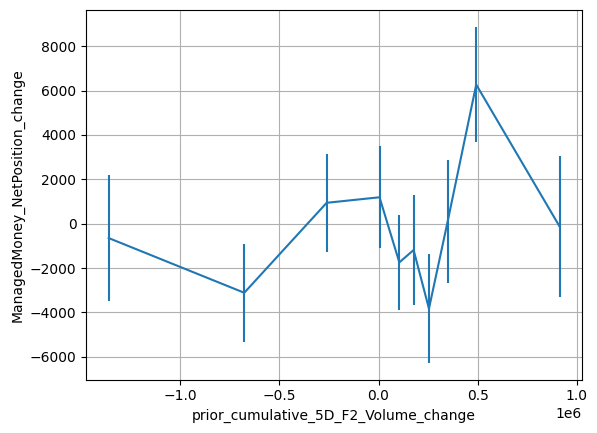

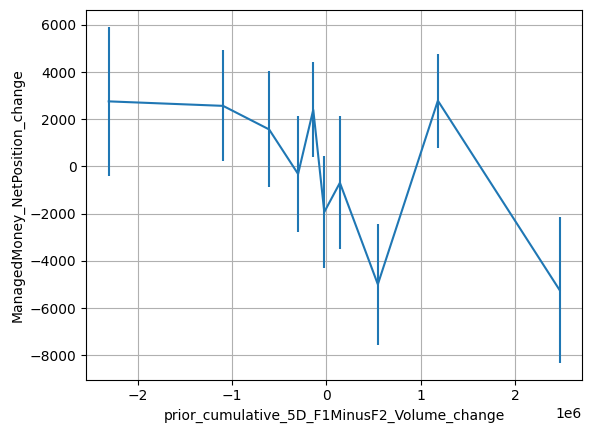

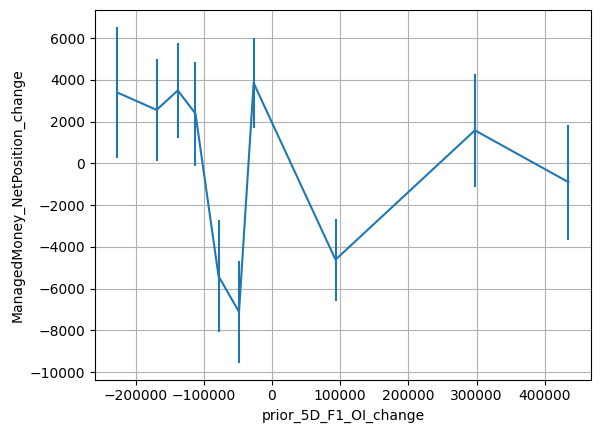

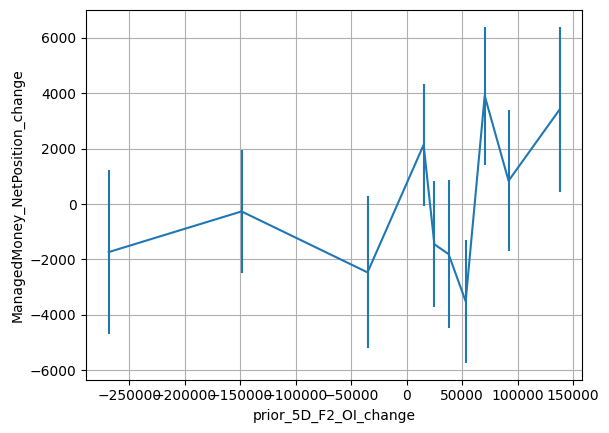

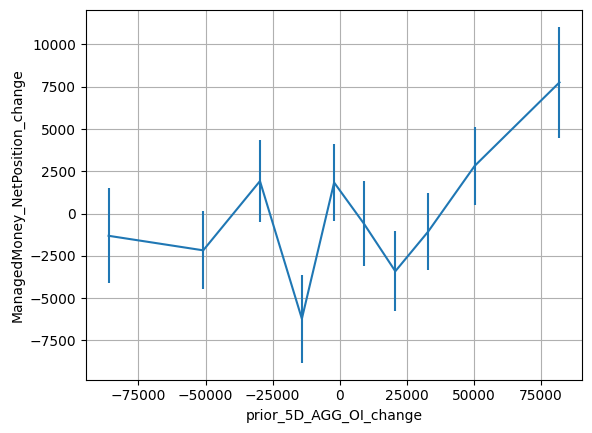

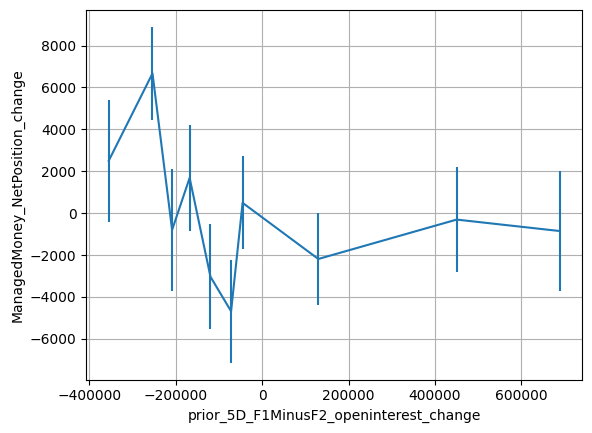

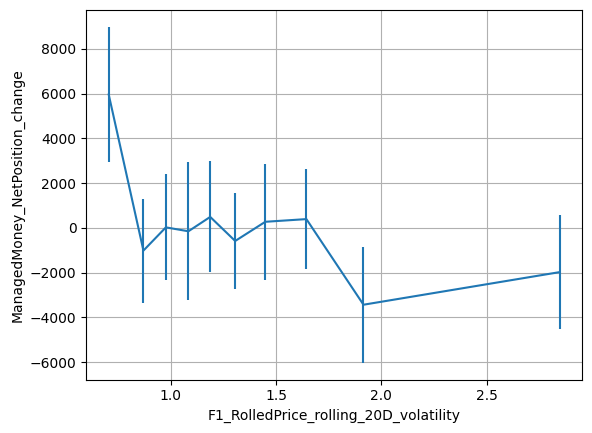

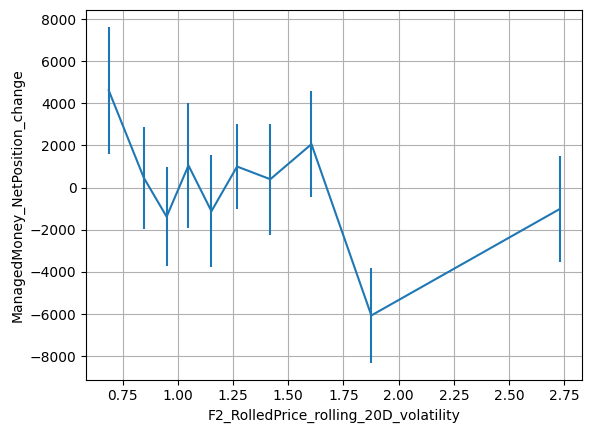

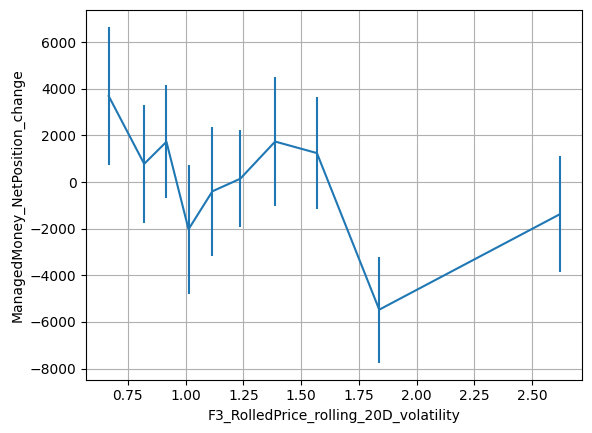

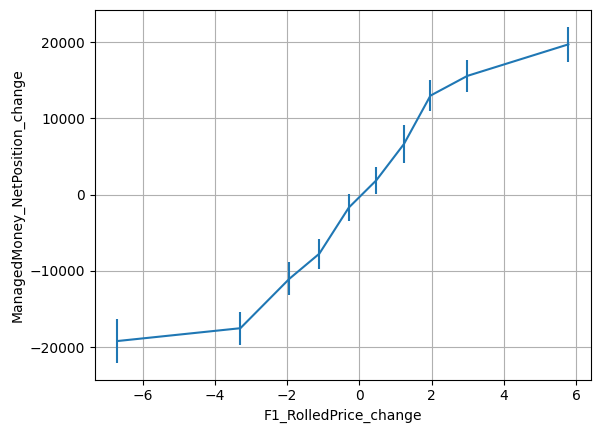

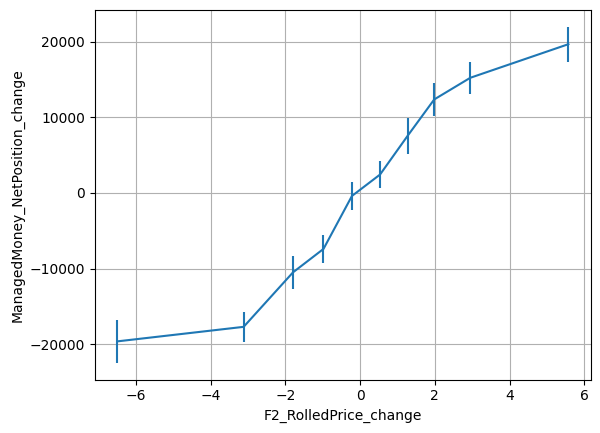

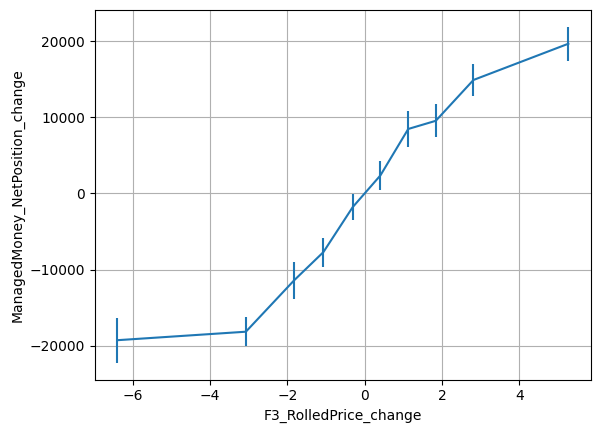

In [28]:
for  f  in feature_names:
    _=plot_bin_summary_of_xy(
                    x = dataset[f],
                    y = dataset['ManagedMoney_NetPosition_change'],
                    k= 10 ,
        xlabel = f, 
        ylabel = 'ManagedMoney_NetPosition_change'
      )
    plt.grid()
    plt.show()
    plt.close()

In [29]:
get_features_responses_correlation(dataset = dataset,
                                   features = feature_names,
                                   responses=scaled_response_names).sort_values(by = 
scaled_response_names[0])

,Feature,ManagedMoney_NetPosition_to_openinterest_change,ManagedMoney_LongPosition_to_openinterest_change,ManagedMoney_ShortPosition_to_openinterest_change
12,prior_5D_AGG_OI_change,-0.314262,-0.454496,-0.097046
9,prior_cumulative_5D_F1MinusF2_Volume_change,-0.282576,-0.342704,0.016732
7,prior_cumulative_5D_F1_Volume_change,-0.281488,-0.323862,0.033818
10,prior_5D_F1_OI_change,-0.152639,-0.174229,0.038887
13,prior_5D_F1MinusF2_openinterest_change,-0.118932,-0.134324,0.038772
5,prior_report_ManagedMoney_ShortPosition_to_ope...,-0.100530,-0.067581,0.038741
2,prior_report_ManagedMoney_ShortPosition_change,-0.097409,-0.062937,0.032672
6,prior_report_SyntheticF1MinusF2_RolledPrice_ch...,-0.044352,-0.046244,0.024694
14,F1_RolledPrice_rolling_20D_volatility,-0.002773,0.007551,0.031008
16,F3_RolledPrice_rolling_20D_volatility,-0.001407,0.014512,0.033624


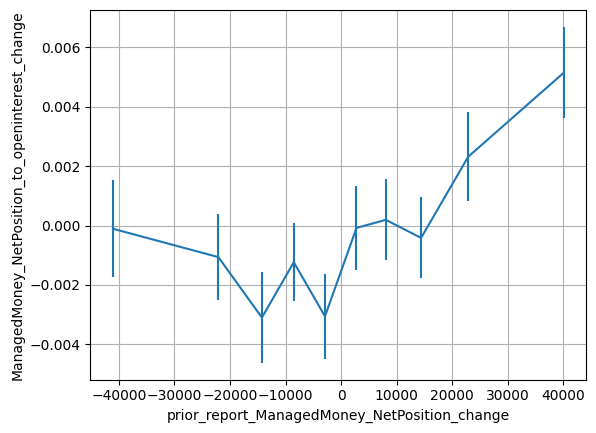

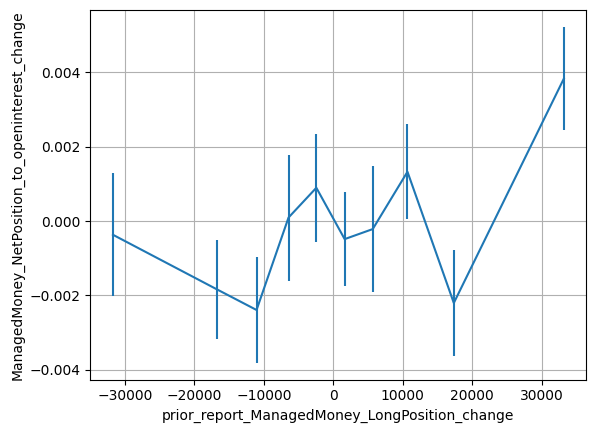

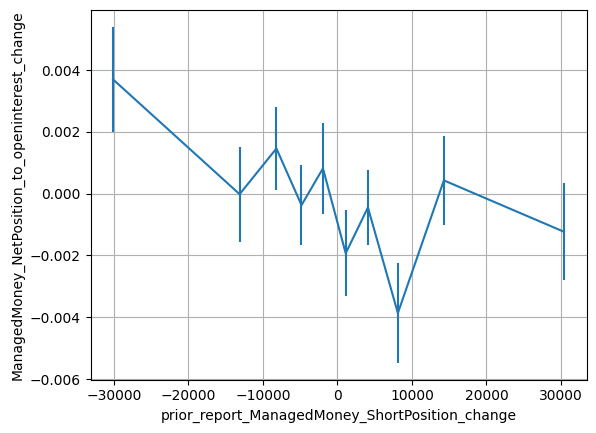

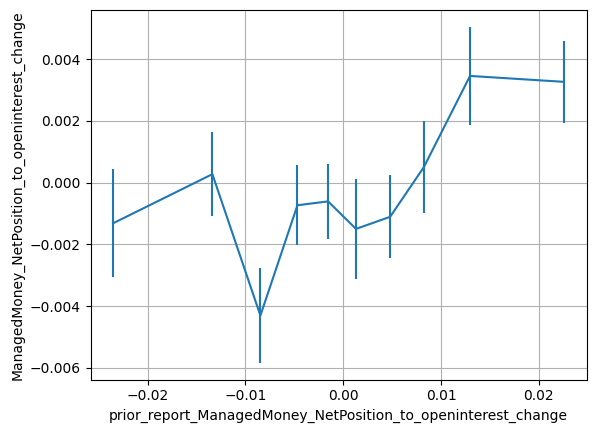

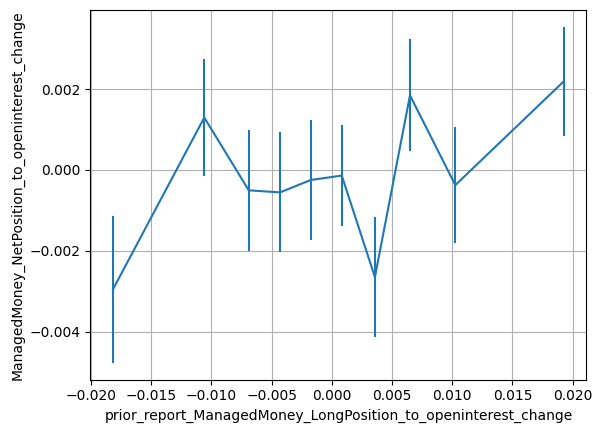

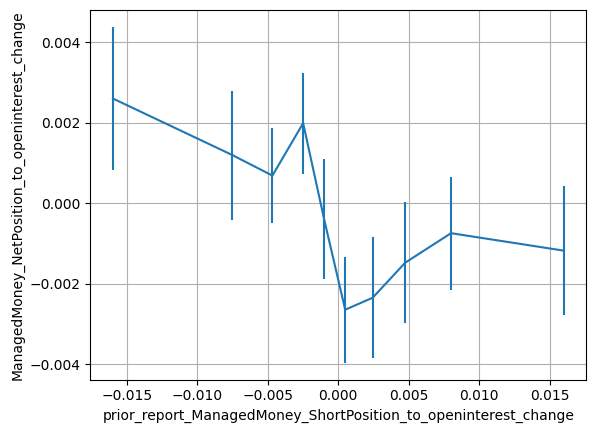

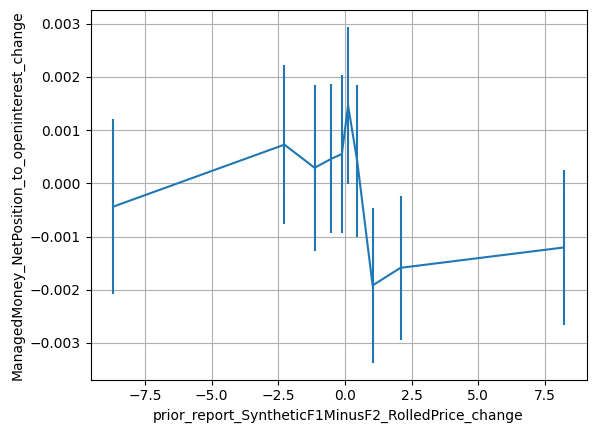

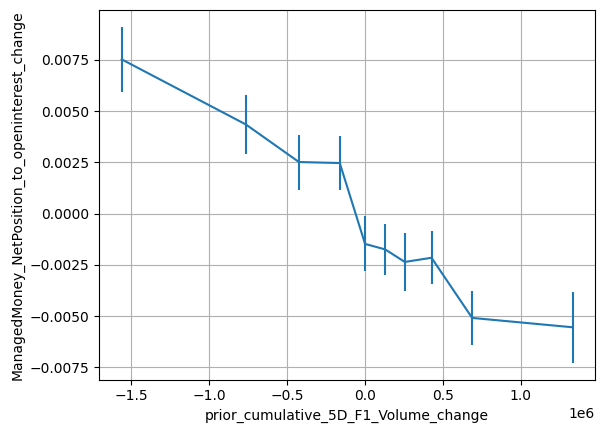

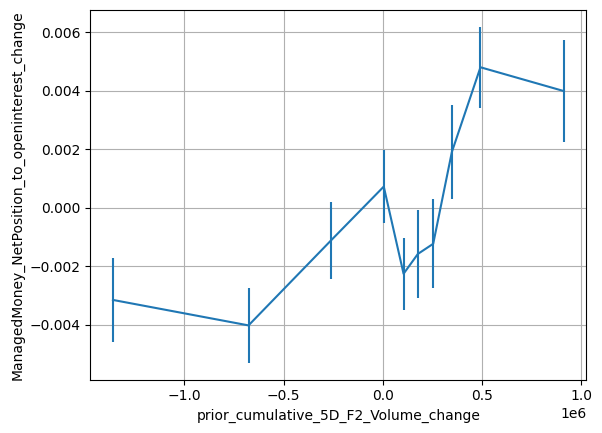

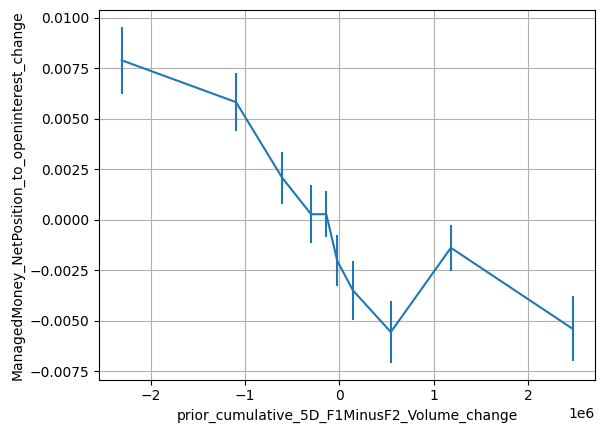

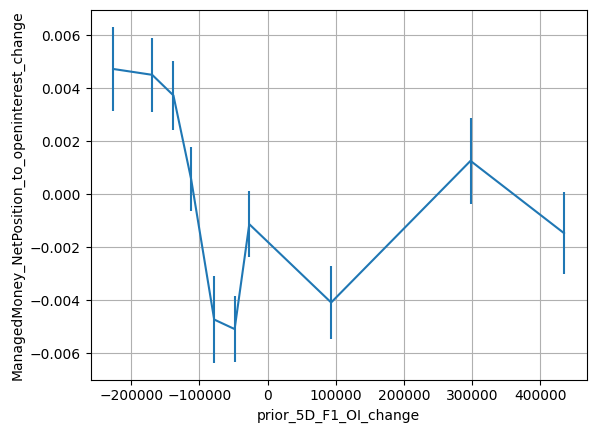

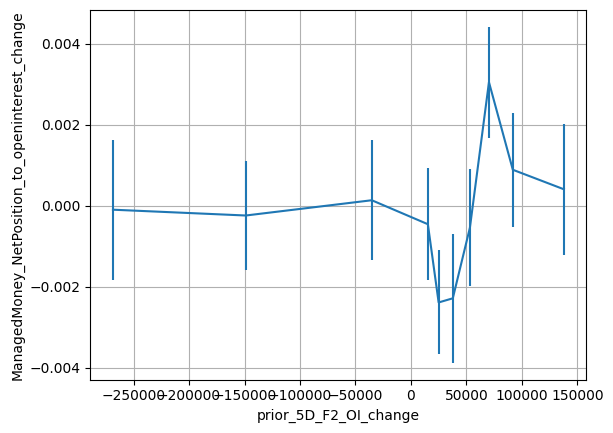

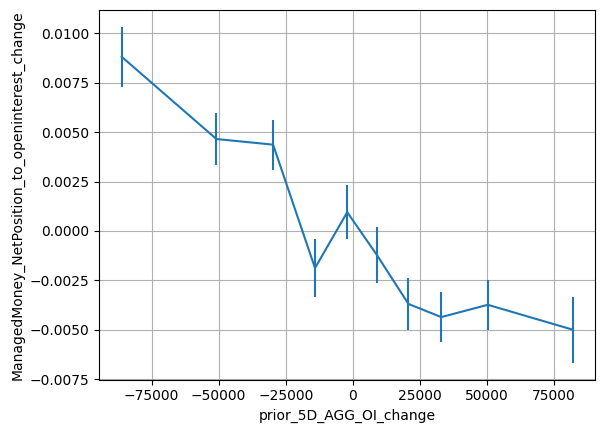

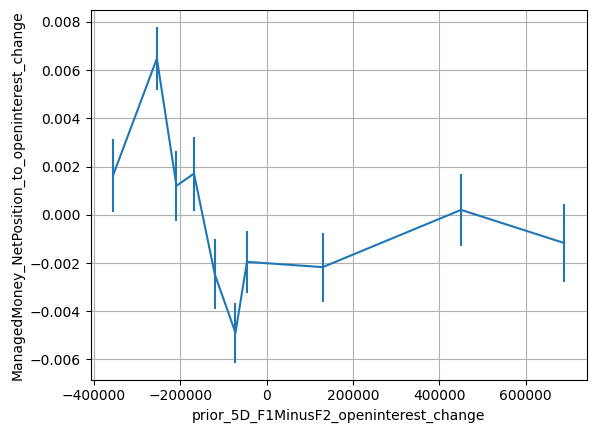

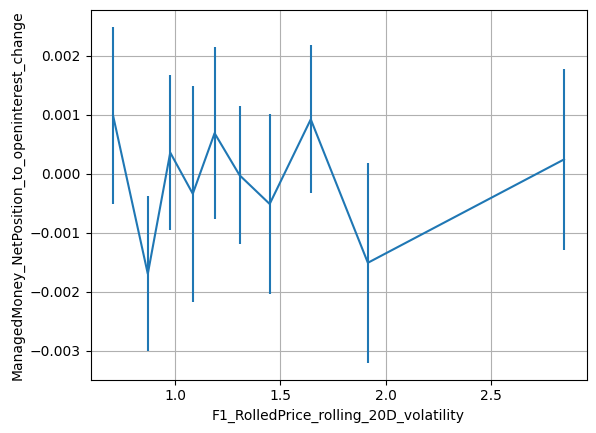

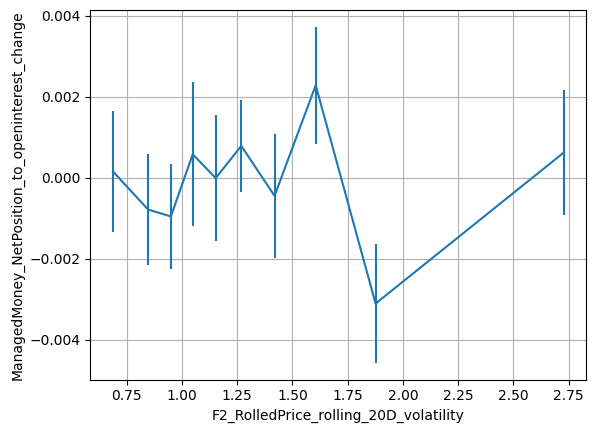

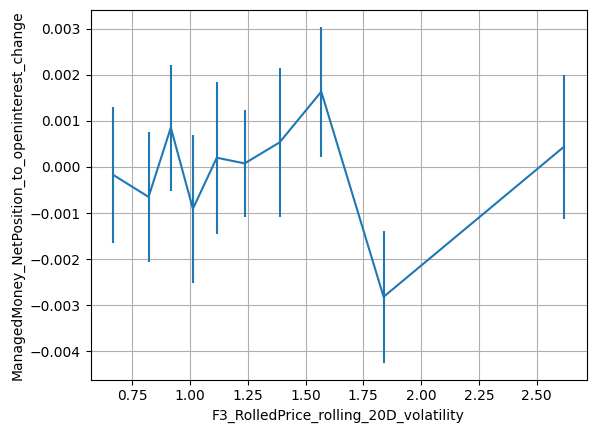

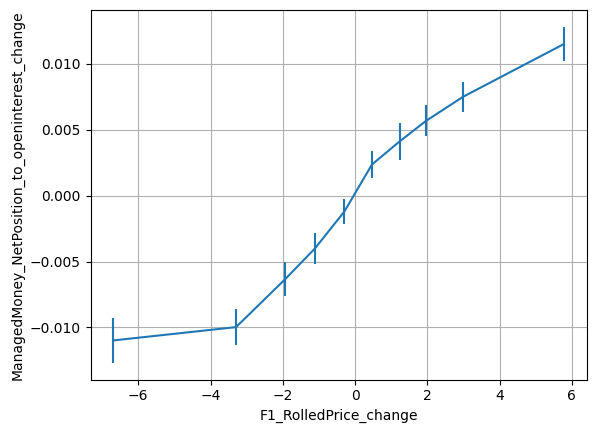

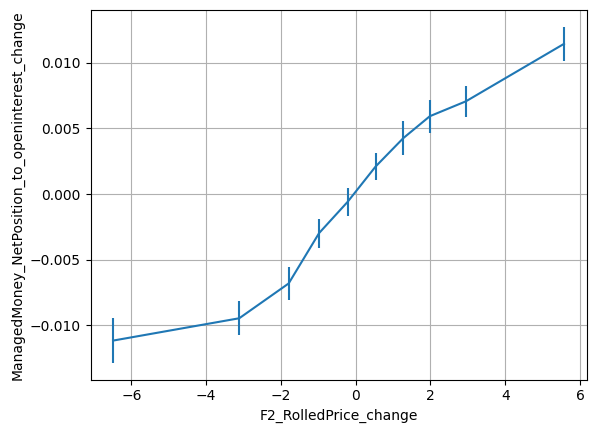

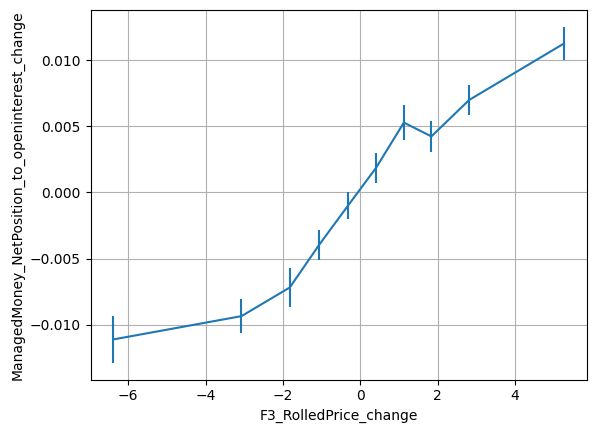

In [30]:
for  f  in feature_names:
    _=plot_bin_summary_of_xy(
                    x = dataset[f],
                    y = dataset['ManagedMoney_NetPosition_to_openinterest_change'],
                    k= 10 ,
        xlabel = f, 
        ylabel = 'ManagedMoney_NetPosition_to_openinterest_change'
      )
    plt.grid()
    plt.show()
    plt.close()

In [31]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [32]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [33]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [34]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [37]:
Xy = dataset[['tradeDate']+feature_names+scaled_response_names].dropna()
Xy.reset_index(drop=True, inplace= True)

In [38]:
relevance_model = HistGradientBoostingRegressor(max_iter=10)
redundancy_model = HistGradientBoostingRegressor(max_iter=10)

In [39]:
from  research.feature_selection.master_selector import MasterSelector

In [40]:
selected_features_by_response = {}
for response in ['ManagedMoney_NetPosition_to_openinterest_change',
                'ManagedMoney_LongPosition_to_openinterest_change',
                'ManagedMoney_ShortPosition_to_openinterest_change']:
    print(response)
    master_selector_builder = MasterSelector( cv = cv,
                                     relevance_model = relevance_model,
                                     redundancy_model = redundancy_model,
                                     feature_names  = feature_names,
                                     response_name  = response,
                                     feature_similarity_method  = 'pearson',
                                     is_classification  = False,
                                     verbose  = False
                                     ) 
    master_selector_builder.fit(dataset=Xy)
    selected_feature_names = master_selector_builder.selected_feature_names
    print(selected_feature_names)
    selected_features_by_response[response] = selected_feature_names

ManagedMoney_NetPosition_to_openinterest_change
For q=39.0, the optimal variance is 1.0 , and objective function is 2192.38,and max random eigen value: 1.35,and # of signal factors: 6
['prior_report_ManagedMoney_NetPosition_change', 'prior_report_ManagedMoney_LongPosition_change', 'prior_5D_F1_OI_change', 'prior_5D_AGG_OI_change', 'F1_RolledPrice_change']
ManagedMoney_LongPosition_to_openinterest_change
For q=39.0, the optimal variance is 1.0 , and objective function is 2192.38,and max random eigen value: 1.35,and # of signal factors: 6
['prior_report_ManagedMoney_ShortPosition_to_openinterest_change', 'F3_RolledPrice_change', 'prior_5D_F1_OI_change', 'prior_5D_AGG_OI_change']
ManagedMoney_ShortPosition_to_openinterest_change
For q=39.0, the optimal variance is 1.0 , and objective function is 2192.38,and max random eigen value: 1.35,and # of signal factors: 6
['prior_cumulative_5D_F2_Volume_change', 'prior_report_ManagedMoney_NetPosition_change', 'prior_report_ManagedMoney_LongPosition

In [41]:
selected_features_by_response

{'ManagedMoney_NetPosition_to_openinterest_change': ['prior_report_ManagedMoney_NetPosition_change',
  'prior_report_ManagedMoney_LongPosition_change',
  'prior_5D_F1_OI_change',
  'prior_5D_AGG_OI_change',
  'F1_RolledPrice_change'],
 'ManagedMoney_LongPosition_to_openinterest_change': ['prior_report_ManagedMoney_ShortPosition_to_openinterest_change',
  'F3_RolledPrice_change',
  'prior_5D_F1_OI_change',
  'prior_5D_AGG_OI_change'],
 'ManagedMoney_ShortPosition_to_openinterest_change': ['prior_cumulative_5D_F2_Volume_change',
  'prior_report_ManagedMoney_NetPosition_change',
  'prior_report_ManagedMoney_LongPosition_change',
  'F1_RolledPrice_change']}

In [46]:
import json
with open("wti_cot_mm_selected_features_by_response.json", "w") as f:
    json.dump(selected_features_by_response, f)

In [ ]:
sas

In [ ]:
import statsmodels.api as sm

In [ ]:
sm.OLS(Xy[response_name], sm.add_constant(Xy[selected_feature_names])).fit().summary2()

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, limits=(0.05, 0.05)):
        self.limits = limits

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        X = X.copy()
        if isinstance(X, pd.DataFrame):
            for column in X.columns:
                X[column] = winsorize(X[column], limits=self.limits)
        else:
            X = winsorize(X, limits=self.limits)
        return X


In [ ]:
pipeline = Pipeline([
                        ('winsorize', Winsorizer(limits=(0.02, 0.02))),
                        ('scaler', StandardScaler()),
                        ('model', ExtraTreesRegressor(n_estimators=5000, max_depth=10) )
                        ])




# pipeline = Pipeline([
#                         ('winsorize', Winsorizer(limits=(0.02, 0.02))),
#                         ('scaler', StandardScaler()),
#                         ('model', pipeline )
#                         ])



In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold

In [ ]:
# yhat = cross_val_predict(  pipeline,
#                     Xy[selected_feature_names],
#                         Xy[response_name],
#                         cv=10,
#                         method = 'predict',
#                         n_jobs=10)

In [ ]:
Xy.reset_index(drop=True, inplace=True)

In [ ]:
yhat = cpcv_predict(  HistGradientBoostingRegressor(max_iter=250, learning_rate=0.01 ),
                    Xy[selected_feature_names],
                        Xy[response_name],
                        cv=cv,
                        method = 'predict',
                        n_jobs=10)

In [ ]:
_=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
plt.xlabel(f'{response_name} - Nowcasted')
plt.ylabel(f'{response_name} - Actual')
plt.grid()
plt.title('CPCV Evaluation')

In [ ]:
import datetime

In [ ]:
walk_forward_dates = dataset['tradeDate'].unique().tolist()

In [ ]:
response_name

In [ ]:
yhat= []
true_y =[]
d_trail = []
WTI_ManagedMoney_NetPosition = []
for d in walk_forward_dates[550:]:
    print(d)
    train_data = dataset[dataset['tradeDate']<d+datetime.timedelta(-50)].dropna()
    train_data = train_data[train_data['tradeDate']>=d+datetime.timedelta(-500)].dropna()
    test_data =  dataset[dataset['tradeDate']==d]
    # model = ExtraTreesRegressor()
    model = HistGradientBoostingRegressor(max_iter=250, learning_rate=0.01 )
    model.fit(train_data[selected_feature_names], train_data[response_name])
    yhat.append(model.predict(test_data[selected_feature_names])[0])
    true_y.append( test_data[response_name].iloc[0])
    WTI_ManagedMoney_NetPosition.append(test_data['WTI_ManagedMoney_NetPosition_to_openinterest'].iloc[0])
    d_trail.append(d)

In [ ]:
pd.DataFrame.from_dict({'yhat': yhat , 
    'true_y': true_y , 
    'tradeDate': d_trail,
                   'WTI_ManagedMoney_NetPosition_to_openinterest':WTI_ManagedMoney_NetPosition    }).tail(25)

In [ ]:
_=plot_bin_summary_of_xy(
                    x = yhat,
                    y = true_y,
                    k= 10 )
plt.xlabel(f'{response_name} - Nowcasted')
plt.ylabel(f'{response_name} - Actual')
plt.grid()
plt.title('Walk-Forward Evaluation')

In [ ]:
asas

In [ ]:
_=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
    

In [ ]:
- position is on all futures
- net positioning 
- aggregate OI
- change in price 

In [ ]:
_=plot_bin_summary_of_xy(x=wti_cot_db['prior_report_WTI_CommercialLongPosition_change'],
                       y=wti_cot_db['prior_report_WTI_ManagedMoney_LongPosition_change'],
                       k=10,
                       xlabel  = 'prior_report_WTI_CommercialLongPosition_change', 
                       ylabel = 'prior_report_WTI_ManagedMoney_LongPosition_change' )

In [ ]:
_=plot_bin_summary_of_xy(x=wti_cot_db['prior_report_WTI_CommercialShortPosition_change'],
                       y=wti_cot_db['prior_report_WTI_ManagedMoney_ShortPosition_change'],
                       k=10,
                       xlabel  = 'prior_report_WTI_CommercialShortPosition_change', 
                       ylabel = 'prior_report_WTI_ManagedMoney_ShortPosition_change' )

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(wti_cot_db['prior_report_WTI_Commercial_NetPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("ACF - prior_report_WTI_Commercial_NetPosition_change ")

plot_pacf(wti_cot_db['prior_report_WTI_Commercial_NetPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("PACF - prior_report_WTI_Commercial_NetPosition_change")

plt.tight_layout()
plt.show()

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(wti_cot_db['prior_report_WTI_ManagedMoney_NetPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("ACF - prior_report_WTI_ManagedMoney_NetPosition_change ")

plot_pacf(wti_cot_db['prior_report_WTI_ManagedMoney_NetPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("PACF - prior_report_WTI_ManagedMoney_NetPosition_change")

plt.tight_layout()
plt.show()

In [ ]:
get_features_responses_correlation(dataset=wti_cot_db,
                                    features =  ['WTI_Commercial_NetPosition', 
                                                'WTI_CommercialLongPosition', 
                                                'WTI_CommercialShortPosition'],
                                    responses = [ 'WTI_ManagedMoney_NetPosition',
                            'WTI_ManagedMoney_LongPosition', 
                            'WTI_ManagedMoney_ShortPosition'])

In [ ]:
get_features_responses_correlation(dataset=wti_cot_db,
                                    features =  ['prior_report_WTI_Commercial_NetPosition_change', 
                                                'prior_report_WTI_CommercialLongPosition_change', 
                                                'prior_report_WTI_CommercialShortPosition_change'],
                                    responses = [ 'prior_report_WTI_ManagedMoney_NetPosition_change',
                            'prior_report_WTI_ManagedMoney_LongPosition_change', 
                            'prior_report_WTI_ManagedMoney_ShortPosition_change'])

In [ ]:
commercial_mm_net_position_correlation = []
commercial_mm_long_position_correlation = []
commercial_mm_short_position_correlation = []
year_trail = []
for (y,gp) in wti_cot_db.groupby('year'):
    year_trail.append(y)
    print(f'{y}')
    correlation_df=get_features_responses_correlation(dataset=gp,
                                    features =  ['WTI_Commercial_NetPosition' ],
                                    responses = [ 'WTI_ManagedMoney_NetPosition'])
    commercial_mm_net_position_correlation.append(correlation_df.iloc[0,1])
    long_correlation_df=get_features_responses_correlation(dataset=gp,
                                    features =  ['WTI_CommercialLongPosition' ],
                                    responses = [ 'WTI_ManagedMoney_LongPosition'])
    commercial_mm_long_position_correlation.append(long_correlation_df.iloc[0,1])
    short_correlation_df=get_features_responses_correlation(dataset=gp,
                                    features =  ['WTI_CommercialShortPosition' ],
                                    responses = [ 'WTI_ManagedMoney_ShortPosition'])
    commercial_mm_short_position_correlation.append(short_correlation_df.iloc[0,1])    
    
    

In [ ]:
commercial_mm_net_position_correlation_df=pd.DataFrame({'year':year_trail,
'commercial_mm_net_position_correlation':commercial_mm_net_position_correlation})

In [ ]:
commercial_mm_long_position_correlation_df=pd.DataFrame({'year':year_trail,
'commercial_mm_long_position_correlation':commercial_mm_long_position_correlation})

In [ ]:
commercial_mm_short_position_correlation_df=pd.DataFrame({'year':year_trail,
'commercial_mm_short_position_correlation':commercial_mm_short_position_correlation})

In [ ]:
plt.plot(commercial_mm_net_position_correlation_df['year'],
         commercial_mm_net_position_correlation_df['commercial_mm_net_position_correlation'],'-')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Pearson Correlation')
plt.title('Commercial vs Managed Money Net Position Correlation')
         

In [ ]:
plt.plot(commercial_mm_long_position_correlation_df['year'],
         commercial_mm_long_position_correlation_df['commercial_mm_long_position_correlation'],'-')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Pearson Correlation')
plt.title('Commercial vs Managed Money Long Position Correlation')
         

In [ ]:
plt.plot(commercial_mm_short_position_correlation_df['year'],
         commercial_mm_short_position_correlation_df['commercial_mm_short_position_correlation'],'-')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Pearson Correlation')
plt.title('Commercial vs Managed Money Short Position Correlation')
         

In [ ]:
commercial_mm_net_position_change_correlation = []
commercial_mm_long_position_change_correlation = []
commercial_mm_short_position_change_correlation = []
year_trail = []
for (y,gp) in wti_cot_db.groupby('year'):
    year_trail.append(y)
    print(f'{y}')
    net_change_correlation_df=get_features_responses_correlation(dataset=gp,
                                    features =  ['prior_report_WTI_Commercial_NetPosition_change' ],
                                    responses = [ 'prior_report_WTI_ManagedMoney_NetPosition_change'])
    commercial_mm_net_position_change_correlation.append(net_change_correlation_df.iloc[0,1])
    long_change_correlation_df=get_features_responses_correlation(dataset=gp,
                                    features =  ['prior_report_WTI_CommercialLongPosition_change' ],
                                    responses = [ 'prior_report_WTI_ManagedMoney_LongPosition_change'])
    commercial_mm_long_position_change_correlation.append(long_change_correlation_df.iloc[0,1])
    short_change_correlation_df=get_features_responses_correlation(dataset=gp,
                                    features =  ['prior_report_WTI_CommercialShortPosition_change' ],
                                    responses = [ 'prior_report_WTI_ManagedMoney_ShortPosition_change'])
    commercial_mm_short_position_change_correlation.append(short_change_correlation_df.iloc[0,1])    

In [ ]:
commercial_mm_net_position_change_correlation_df=pd.DataFrame({'year':year_trail,
'commercial_mm_net_position_change_correlation':commercial_mm_net_position_change_correlation})

In [ ]:
commercial_mm_long_position_change_correlation_df=pd.DataFrame({'year':year_trail,
'commercial_mm_long_position_change_correlation':commercial_mm_long_position_change_correlation})

In [ ]:
commercial_mm_short_position_change_correlation_df=pd.DataFrame({'year':year_trail,
'commercial_mm_short_position_change_correlation':commercial_mm_short_position_change_correlation})

In [ ]:
plt.plot(commercial_mm_net_position_change_correlation_df['year'],
         commercial_mm_net_position_change_correlation_df['commercial_mm_net_position_change_correlation'],'-')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Pearson Correlation')
plt.title('Commercial vs Managed Money Net Position Correlation')
         

In [ ]:
plt.plot(commercial_mm_long_position_change_correlation_df['year'],
         commercial_mm_long_position_change_correlation_df['commercial_mm_long_position_change_correlation'],'-')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Pearson Correlation')
plt.title('Commercial vs Managed Money Long Position Correlation')

In [ ]:
plt.plot(commercial_mm_short_position_change_correlation_df['year'],
         commercial_mm_short_position_change_correlation_df['commercial_mm_short_position_change_correlation'],'-')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Pearson Correlation')
plt.title('Commercial vs Managed Money Short Position Correlation')

In [ ]:
sasa

In [ ]:
cot_db = pd.read_csv('../cache/raw_data/cot_db.csv')

In [ ]:
volume_db = pd.read_csv('../cache/raw_data/volume_db.csv')

In [ ]:
oi_db = pd.read_csv('../cache/raw_data/oi_db.csv')

In [ ]:
oi_db

In [ ]:
raw_data = pd.read_csv('../cache/raw_data/index_roll_data.csv')

In [ ]:
raw_data.shape

In [ ]:
raw_data.columns.tolist()

In [ ]:
raw_data.isna().sum()

In [ ]:
raw_data.isnull().sum()

In [ ]:
raw_data.columns =['tradeDate', 
                   'CL1_Price',
                   'CL2_Price', 
                   'CL3_Price', 
                   'CL1_RolledPrice', 
                   'CL2_RolledPrice',
                    'CL3_RolledPrice', 
                    'WTI_Commercial_NetPosition', 
                    'WTI_CommercialLongPosition', 
                    'WTI_CommercialShortPosition', 
                    'WTI_ManagedMoney_NetPosition',
                    'WTI_ManagedMoney_LongPosition', 
                    'WTI_ManagedMoney_ShortPosition']

In [ ]:
raw_data['tradeDate'] = pd.to_datetime(raw_data['tradeDate']).dt.date

In [ ]:
min_date = raw_data['tradeDate'].min()
max_date = raw_data['tradeDate'].max()

In [ ]:
raw_data.shape

In [ ]:
business_dates = get_business_dates(start_date=min_date, end_date=max_date)

In [ ]:
set(set(raw_data['tradeDate'].unique().tolist()) - set(business_dates))

In [ ]:
raw_data['dayOfWeek'] = pd.to_datetime(raw_data['tradeDate']).dt.day_name()

In [ ]:
import collections

In [ ]:
collections.Counter(raw_data['dayOfWeek'])

In [ ]:
raw_data.sort_values(by= 'tradeDate', ascending = True, inplace = True) 

In [ ]:
positioning_data = raw_data[['tradeDate',
           'dayOfWeek', 
 'WTI_Commercial_NetPosition',
 'WTI_CommercialLongPosition',
 'WTI_CommercialShortPosition',
 'WTI_ManagedMoney_NetPosition',
 'WTI_ManagedMoney_LongPosition',
 'WTI_ManagedMoney_ShortPosition'
]].dropna()

In [ ]:
positioning_data.sort_values(by= 'tradeDate', ascending = True, inplace = True) 

In [ ]:
positioning_data['prior_period_WTI_Commercial_NetPosition_change'] = positioning_data['WTI_Commercial_NetPosition'] -positioning_data['WTI_Commercial_NetPosition'].shift(1)
positioning_data['prior_period_WTI_Commercial_LongPosition_change'] = positioning_data['WTI_CommercialLongPosition'] -positioning_data['WTI_CommercialLongPosition'].shift(1)
positioning_data['prior_period_WTI_Commercial_ShortPosition_change'] = positioning_data['WTI_CommercialShortPosition'] -positioning_data['WTI_CommercialShortPosition'].shift(1)

In [ ]:
positioning_data['prior_period_WTI_ManagedMoney_NetPosition_change'] = positioning_data['WTI_ManagedMoney_NetPosition'] -positioning_data['WTI_ManagedMoney_NetPosition'].shift(1)
positioning_data['prior_period_WTI_ManagedMoney_LongPosition_change'] = positioning_data['WTI_ManagedMoney_LongPosition'] -positioning_data['WTI_ManagedMoney_LongPosition'].shift(1)
positioning_data['prior_period_WTI_ManagedMoney_ShortPosition_change'] = positioning_data['WTI_ManagedMoney_ShortPosition'] -positioning_data['WTI_ManagedMoney_ShortPosition'].shift(1)

In [ ]:
import pandas as pd

df = pd.DataFrame({
    'ds': pd.to_datetime(positioning_data['tradeDate']),
    'y': positioning_data['prior_period_WTI_ManagedMoney_NetPosition_change']
}).dropna()


In [ ]:
df_prophet = positioning_data[['tradeDate',
                               'prior_period_WTI_Commercial_NetPosition_change']].rename(columns={'tradeDate': 'ds',
                                                                                                    
                                                                                                    'prior_period_WTI_Commercial_NetPosition_change': 'y'})


In [ ]:
df_prophet

In [ ]:
m = Prophet( )
m.fit(df_prophet)
forecast = m.predict(df_prophet)



In [ ]:
_=m.plot_components(forecast)

In [ ]:
from prophet import Prophet

model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.fit(df)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example time series (replace with your data)
np.random.seed(42)
ts = pd.Series(np.random.randn(100).cumsum())

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(positioning_data['prior_period_WTI_Commercial_NetPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(positioning_data['prior_period_WTI_Commercial_NetPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example time series (replace with your data)
np.random.seed(42)
ts = pd.Series(np.random.randn(100).cumsum())

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(positioning_data['prior_period_WTI_ManagedMoney_LongPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(positioning_data['prior_period_WTI_ManagedMoney_LongPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example time series (replace with your data)
np.random.seed(42)
ts = pd.Series(np.random.randn(100).cumsum())

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(positioning_data['prior_period_WTI_ManagedMoney_ShortPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(positioning_data['prior_period_WTI_ManagedMoney_ShortPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Example time series (replace with your data)
np.random.seed(42)
ts = pd.Series(np.random.randn(100).cumsum())

# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

plot_acf(positioning_data['prior_period_WTI_ManagedMoney_NetPosition_change'].dropna(), lags=20, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

plot_pacf(positioning_data['prior_period_WTI_ManagedMoney_NetPosition_change'].dropna(), lags=20, ax=axes[1], method='ywm')  # 'ywm' is robust
axes[1].set_title("Partial Autocorrelation Function (PACF)")

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import warnings

def walk_forward_arma_prediction(series: pd.Series, burn_in: int = 100):
    """
    Perform walk-forward prediction using ARMA(1,1) on a given time series and plot the results.

    Parameters:
        series (pd.Series): The time series data.
        burn_in (int): Number of initial points to skip for fitting.

    Returns:
        Tuple[pd.Series, Optional[float]]: The predicted values and final MSE if computable.
    """
    predictions = []
    true_values = []
    indices = []

    for t in range(burn_in, len(series) - 1):
        train_data = series.iloc[:t+1]
        

                
        model = ARIMA(train_data, order=(1, 0, 1))
        model_fit = model.fit()
        yhat = model_fit.forecast(steps=1).iloc[0]
                


        predictions.append(yhat)
        true_values.append(series.iloc[t + 1])
        indices.append(series.index[t + 1])

    # Create Series
    predictions = pd.Series(predictions, index=indices)
    true_values = pd.Series(true_values, index=indices)

    # Drop NaNs
    mask = predictions.notna()
    predictions = predictions[mask]
    true_values = true_values[mask]

    if len(predictions) == 0:
        print("❌ All predictions failed. Cannot compute MSE or plot.")
        return predictions, None

    mse = mean_squared_error(true_values, predictions)
    print(f"✅ Valid predictions: {len(predictions)} | MSE = {mse:.4f}")

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(true_values, label="Actual", linewidth=2)
    plt.plot(predictions, label="Predicted", linestyle='--')
    plt.title(f"ARMA(1,1) Walk-Forward Prediction\nMSE = {mse:.4f}")
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
        # Plot 2: Scatter plot (parity plot)
    plt.figure(figsize=(6, 6))
    plt.scatter(true_values, predictions, alpha=0.6)
    plt.plot([true_values.min(), true_values.max()],
             [true_values.min(), true_values.max()],
             linestyle='--', color='red', label='Ideal')
    plt.title("Predicted vs Actual")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    return true_values,predictions, mse


In [ ]:
positioning_data['prior_period_WTI_ManagedMoney_NetPosition_change'].dropna()

In [ ]:
from statsmodels.tsa.arima_process import ArmaProcess

# np.random.seed(42)
# ar = np.array([1, -0.7])
# ma = np.array([1, 0.5])
# arma_process = ArmaProcess(ar, ma)
# series = pd.Series(arma_process.generate_sample(nsample=500))

true_values,predictions, mse = walk_forward_arma_prediction(positioning_data['prior_period_WTI_Commercial_NetPosition_change'].dropna().reset_index(drop=True), burn_in=100)

In [ ]:
from research.plots import plot_bin_summary_of_xy

In [ ]:
_=plot_bin_summary_of_xy(x=positioning_data['prior_period_WTI_Commercial_NetPosition_change'],
                       y=positioning_data['prior_period_WTI_ManagedMoney_NetPosition_change'],
                       k=10,
                        xlabel='prior_period_WTI_Commercial_NetPosition_change',
                        ylabel='prior_period_WTI_ManagedMoney_NetPosition_change' )
                       

In [ ]:
_=plot_bin_summary_of_xy(x=positioning_data['prior_period_WTI_Commercial_LongPosition_change'],
                       y=positioning_data['prior_period_WTI_ManagedMoney_ShortPosition_change'],
                       k=10,
                        xlabel='prior_period_WTI_Commercial_LongPosition_change',
                        ylabel='prior_period_WTI_ManagedMoney_ShortPosition_change' )

In [ ]:
_=plot_bin_summary_of_xy(x=positioning_data['prior_period_WTI_Commercial_ShortPosition_change'],
                       y=positioning_data['prior_period_WTI_ManagedMoney_LongPosition_change'],
                       k=10,
                        xlabel='prior_period_WTI_Commercial_ShortPosition_change',
                        ylabel='prior_period_WTI_ManagedMoney_LongPosition_change' )

In [ ]:
_=plot_bin_summary_of_xy(x=predictions,
                       y=true_values,
                       k=10,
                        xlabel='Prediction',
                        ylabel='Actual',
                        title='Commercial Net prediction with ARMA(1,1)')
                       

In [ ]:
positioning_data

In [ ]:
for f in [  'CL1_Price',
                   'CL2_Price', 
                   'CL3_Price', 
                   'CL1_RolledPrice', 
                   'CL2_RolledPrice',
                    'CL3_RolledPrice', 
                    'WTI_Commercial_NetPosition', 
                    'WTI_CommercialLongPosition', 
                    'WTI_CommercialShortPosition', 
                    'WTI_ManagedMoney_NetPosition',
                    'WTI_ManagedMoney_LongPosition', 
                    'WTI_ManagedMoney_ShortPosition']:
    plt.hist(raw_data[f], bins = 100, log =True)
    plt.title(f)
    plt.show()
    plt.close()

In [ ]:
for f in [  'CL1_Price',
                   'CL2_Price', 
                   'CL3_Price', 
                   'CL1_RolledPrice', 
                   'CL2_RolledPrice',
                    'CL3_RolledPrice']:
    raw_data[f'prior_5D_{f}_change']=raw_data[f'{f}'] - raw_data[f'{f}'].shift(5)
for w in [1,2,3,4,5,10,15,20]:
    for f in [  'CL1_Price',
                   'CL2_Price', 
                   'CL3_Price', 
                   'CL1_RolledPrice', 
                   'CL2_RolledPrice',
                    'CL3_RolledPrice']:
        raw_data[f'next_{w}D_{f}_change']= raw_data[f'{f}'].shift(-w) - raw_data[f'{f}'] 
        raw_data[f'prior_{w}D_{f}_change']= raw_data[f'{f}']  - raw_data[f'{f}'].shift(w) 

In [ ]:
raw_data[[
                    'WTI_Commercial_NetPosition', 
                    'WTI_CommercialLongPosition', 
                    'WTI_CommercialShortPosition', 
                    'WTI_ManagedMoney_NetPosition',
                    'WTI_ManagedMoney_LongPosition', 
                    'WTI_ManagedMoney_ShortPosition']].corr()

In [ ]:
from research.metrics import get_features_responses_correlation

In [ ]:
raw_data.columns.tolist()

In [ ]:
?get_features_responses_correlation

In [ ]:
raw_data=pd.merge(raw_data,
            positioning_data[['tradeDate',
             'prior_period_WTI_Commercial_NetPosition_change',
                             'prior_period_WTI_Commercial_LongPosition_change',
                             'prior_period_WTI_Commercial_ShortPosition_change',
                               'prior_period_WTI_ManagedMoney_NetPosition_change',
                             'prior_period_WTI_ManagedMoney_LongPosition_change',
                             'prior_period_WTI_ManagedMoney_ShortPosition_change',
                             
                             ]],
         on = 'tradeDate',
         how ='inner')

In [ ]:
cl1_responses=[f'next_{w}D_CL1_RolledPrice_change' for w in [1,2,3,4,5,10,15,20] ] 
cl2_responses=[f'next_{w}D_CL2_RolledPrice_change' for w in [1,2,3,4,5,10,15,20] ] 
spread_responses=[f'next_{w}D_CL1MinusCL2_RolledPrice_change' for w in [1,2,3,4,5,10,15,20] ] 
prior_cl1_responses=[f'prior_{w}D_CL1_RolledPrice_change' for w in [1,2,3,4,5,10,15,20] ] 
prior_cl2_responses=[f'prior_{w}D_CL2_RolledPrice_change' for w in [1,2,3,4,5,10,15,20] ] 
prior_spread_responses=[f'prior_{w}D_CL1MinusCL2_RolledPrice_change' for w in [1,2,3,4,5,10,15,20] ] 


In [ ]:
for w in [1,2,3,4,5,10,15,20]:
    raw_data[f'next_{w}D_CL1MinusCL2_RolledPrice_change'] = raw_data[f'next_{w}D_CL1_RolledPrice_change']-raw_data[f'next_{w}D_CL2_RolledPrice_change']
for w in [1,2,3,4,5,10,15,20]:
    raw_data[f'prior_{w}D_CL1MinusCL2_RolledPrice_change'] = raw_data[f'prior_{w}D_CL1_RolledPrice_change']-raw_data[f'prior_{w}D_CL2_RolledPrice_change']

In [ ]:
get_features_responses_correlation(
    dataset = raw_data,
    features = ['prior_period_WTI_Commercial_NetPosition_change','prior_period_WTI_Commercial_LongPosition_change',
                             'prior_period_WTI_Commercial_ShortPosition_change'],
    responses = spread_responses ).T

In [ ]:
get_features_responses_correlation(
    dataset = raw_data,
    features = ['prior_period_WTI_Commercial_NetPosition_change','prior_period_WTI_Commercial_LongPosition_change',
                             'prior_period_WTI_Commercial_ShortPosition_change'],
    responses = prior_cl1_responses ).T

In [ ]:
get_features_responses_correlation(
    dataset = raw_data,
    features = ['prior_period_WTI_Commercial_NetPosition_change','prior_period_WTI_Commercial_LongPosition_change',
                             'prior_period_WTI_Commercial_ShortPosition_change'],
    responses = prior_spread_responses ).T

In [ ]:
get_features_responses_correlation(
    dataset = raw_data,
    features = ['prior_period_WTI_Commercial_NetPosition_change','prior_period_WTI_Commercial_LongPosition_change',
                             'prior_period_WTI_Commercial_ShortPosition_change'],
    responses = prior_cl1_responses ).T

In [ ]:
get_features_responses_correlation(
    dataset = raw_data,
    features = [ 'prior_period_WTI_ManagedMoney_NetPosition_change',
                             'prior_period_WTI_ManagedMoney_LongPosition_change',
                             'prior_period_WTI_ManagedMoney_ShortPosition_change'],
    responses = spread_responses ).T

In [ ]:
get_features_responses_correlation(
    dataset = raw_data,
    features = [ 'prior_period_WTI_ManagedMoney_NetPosition_change',
                             'prior_period_WTI_ManagedMoney_LongPosition_change',
                             'prior_period_WTI_ManagedMoney_ShortPosition_change'],
    responses = prior_spread_responses ).T